# **Week 3**

## **Day 1**

##### **Logistic Regression**

Now its time to classify Something, that's start with **loigistic regression**, don't be confuse with linear regression,  It is named as 'Logistic Regression', because it's underlying technique is quite the same as Linear Regression. The term **“Logistic”** is taken from the Logit function that is used in this method of classification.

###### **Binary Classification**

> Instead of our contnious output vector Just like in linear Regression (e.g Price of House), In Binary Classfication we have only two Values in $y$ vector which is either 0 or 1, that's why we called it binary classification. \\

> $y\in {\{0,1\}}$ \\

Where 0 is usually taken as the **"negative class"** and 1 as the **"positive class"**, but you are free to assign any representation to it.


###### **Classifcation through Linear Regression**

First we have to find out why not linear regression is not sufficent for classification ?

**Code**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(range(6)).reshape(-1,1)
y = np.array([[0],[0],[0],[1],[1],[1]])

Xbais = np.insert(X,0,1,axis=1)
theta = np.linalg.inv(Xbais.T.dot(Xbais)).dot(Xbais.T.dot(y)) # Using Normal Equation

h = Xbais.dot(theta)

If $h_\theta({x}) \geq 0.5$ predict $y=1$ \\
If $h_\theta({x}) < 0.5$ predict $y=0$

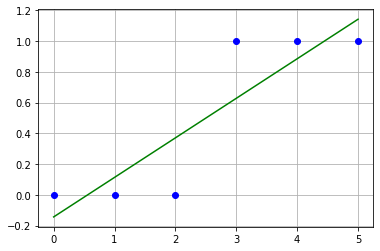

In [ ]:
plt.plot(X,y,'bo')
plt.plot(X,h,'g')
plt.grid()
plt.show()

But when we add one more data, it's distrubed our Hypothesis and we can't make good hypothesis, In simple term this method doesn't work well because classification is not actually a linear function.

**Code**

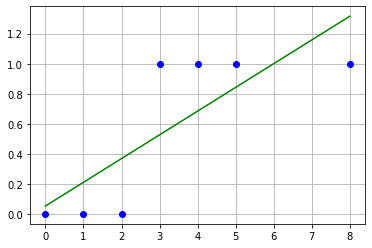

In [ ]:
X = np.array([[0],[1],[2],[3],[4],[5],[8]]).reshape(-1,1)
y = np.array([[0],[0],[0],[1],[1],[1],[1]])

Xbais = np.insert(X,0,1,axis=1)
theta = np.linalg.inv(Xbais.T.dot(Xbais)).dot(Xbais.T.dot(y)) # Using Normal Equation
h = Xbais.dot(theta)

plt.plot(X,y,'bo')
plt.plot(X,h,'g')
plt.grid()
plt.show()

That's why We need Logistic Regression for Classification

###### **Hypothesis Function**

As we know that Logistic regression is an extremely efficient mechanism for calculating **probabilities** so our hypothesis functiuon must return values between 0 and 1. ($0 \leq h_{\theta}(x) \leq 1$) \\

$h_{\theta}(x)=P(y=1|x;\theta)$ \\
> **"Probability that y=1 given x parametrized by $\theta$"**

Our new form uses the **"Sigmoid Function"**, also called the "Logistic Function": \\

$h_{\theta}$ will give us the probability that our output is 1. For example, $h_\theta(x)=0.7$ gives us the probability of 70% that our output is 1 and 30% that our output is 0.

> $h_{\theta}(x) = g(X\theta)$ \\

> $z = X\theta$ \\

> $g(z) = \frac{1}{1+\exp(-z)}$

###### **Code**

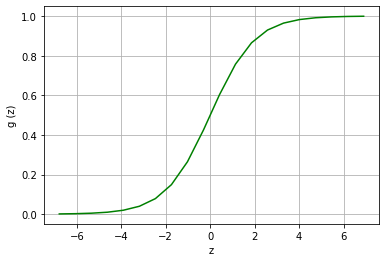

In [ ]:
def sigmoid(z):
  return (1)/(1+np.exp(-z))

def hyp_function(X, theta):
  z = X.dot(theta)
  return sigmoid(z),z

def add_bais(X):
  return np.insert(X,0,1,axis=1)

X = np.array(range(-10,10)).reshape(-1,1)
Xbais = add_bais(X)
np.random.seed(1)
theta = np.random.random((2,1))

h,z = hyp_function(Xbais, theta)

plt.plot(z,h,'g')
plt.grid()
plt.xlabel('z')
plt.ylabel('g (z)')
plt.show()

**This is Sigmoid Function**\

If $h_\theta({x}) \geq 0.5$ predict $y=1$ \\
If $h_\theta({x}) < 0.5$ predict $y=0$

If $z \geq 0$ then $ g(z) \geq 0.5 :
 y=1$  \\
If $z < 0$ then $ g(z) < 0.5 : y=0$

**Remeber**

$z=0,e^0=1⇒g(z)=1/2 \\
z→∞,e^{−∞}→0⇒g(z)=1 \\
z→−∞,e^∞→∞⇒g(z)=0$

## **Day 2**

##### **Decision Boundry**

Decision Boundy is the line that sepearated from y=1 and y=0. \\
$\theta = 
\begin{bmatrix}
5 \\
-1 \\
0 \\
\end{bmatrix}\\
$ //

As we know that $X\theta \geq 0$ then $y=1$ so: \\

$y=1$ if $-5+(-1)x_1+(0)x_2 \geq 0$ \\
$-5-x_1 \geq 0$ \\
$-x_1 \geq -5$ \\
$x_1 \leq 5$ \\

> In this case, our decision boundary is a straight vertical line placed on the graph where $x_1 = 5$, and everything to the left of that denotes $y = 1$, while everything to the right denotes $y = 0$.

> **Note**, the input to the sigmoid function g(z) (e.g. $X\theta$) doesn't need to be linear, and could be a function that describes a circle (e.g. $z = \theta_0 + \theta_1 x_1^2 +\theta_2 x_2^2)$ or any shape to fit our data.

Examples:

$\theta =
\begin{bmatrix}
-3 \\
1 \\
1 \\
\end{bmatrix}
$ \\

$y=1$ if $-3 + x_1 + x_2 \geq 0$ \\
$x_1+x_2 \geq 3$

> so $y=1$ if $x_1+x_2\geq3$

**Code**

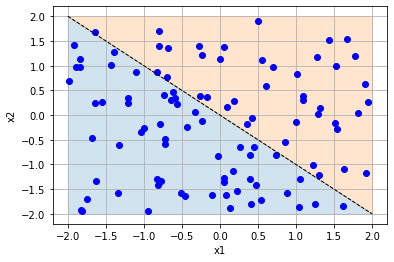

In [ ]:
m = 100
np.random.seed(10)
X = np.random.uniform(-2, 2, (m,1))
y = np.random.uniform(-2, 2, (m,1))
theta = np.array([[0],[1],[1]])

c = -theta[0]/theta[2]
m = -theta[1]/theta[2]
xmin, xmax = -2, 2
ymin, ymax = -2, 2
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(X,y,'bo')
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

**Non linear Descion Boundary**

$
\begin{bmatrix}
-1 \\
0 \\
0 \\
1 \\
1 \\
\end{bmatrix}
$ \\

$y=1$ if $-1+(0)x_1+(0)x_2+(1)x_1^2+(1)x_2^2 \geq 0$ \\
$-1+x_1^2+x_2^2 \geq 0$ \\
$x_1^2+x_2^2 \geq 1$ \\

so $x_1^2+x_2^2 = 1$ is equation of cricle
inside the circle y=0 and outside the circle y=1

##### **Cost Function**

In order to calculate cost function of logistic regression, we can't use cast function of linear regresion becuase the logistic regression will cause the output to bhe wavy, in other words it'll be **non-convex function**.

**Cost Function for logistic regression**

> $J(\theta) = \sum_{i=0}^{m}Cost(h_\theta{(x^{(i)})},y^{(i)})$

> $Cost(h_\theta{(x^{(i)})},y^{(i)}) = -log(h_\theta{(x)})$ -> (if $y=1$)

> $Cost(h_\theta{(x^{(i)})},y^{(i)}) = -log(1-h_\theta{(x)})$ -> (if $y=0$)


> The more our hypothesis is off from y, the larger the cost function output. If our hypothesis is equal to y, then our cost is 0.

> $Cost(h_\theta{(x^{(i)})},y^{(i)}) = 0 $ if $h_\theta{(x)} = y$ 

> $Cost(h_\theta{(x^{(i)})},y^{(i)}) → ∞ $ if y = 0, $h_\theta{(x)} → 1$

> $Cost(h_\theta{(x^{(i)})},y^{(i)}) → ∞ $ if y = 1, $h_\theta{(x)} → 0$ 

###### **Simplified Cost Function**

No we have to add both conditions in to one, and compresse our Cost function.

$Cost(h_\theta{(x^{(i)})},y^{(i)}) = -(y*\log(h(x)) + (1-y)*\log(1-h(x)))$

> Notice that when y is equal to 1, then the second term $(1-y)\log(1-h_\theta(x))$ will be zero and will not affect the result. If y is equal to 0, then the first term $y \log(h_\theta(x))$ will be zero and will not affect the result.

**We can write entire Cost Function as follows:**

> $J(\theta) = -\frac{1}{m}\sum_{i=0}^{m}(y^{(i)}*\log(h(x^{(i)})) + (1-y^{(i)})*\log(1-h(x^{(i)})))$

**Vectorize Implementation**

> $J(θ)=-\frac{1}{m}⋅(y^T\log(h)+(1−y)^T\log(1−h))$

###### **Code**

Predict: thresold>=0.5
[[0.]
 [0.]
 [1.]
 [1.]]
Cost: [[0.34045601]]


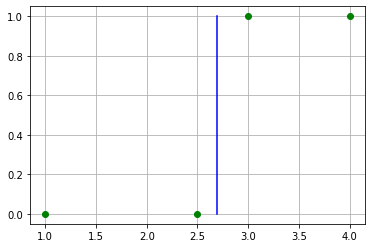

In [ ]:
X = np.array([[1],[2.5],[3],[4]])
Xbais = add_bais(X)
y = np.array([[0],[0],[1],[1]])
theta = np.array([[-3.5],[1.3]])
h,z = hyp_function(Xbais,theta)

# Descision thresold >= 0.5 (h=1 or h=0)
def descision_thresold(h):
  h_changed = np.copy(h)
  h_changed[h_changed >= 0.5] = 1
  h_changed[h_changed < 0.5] = 0
  return h_changed

h_changed = descision_thresold(h)

print(f"Predict: thresold>=0.5\n{h_changed}")

# Logistics Regession Cost Function
def Cost_function(h,y):
  return -(1/y.shape[0]) * (np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))

J = Cost_function(h,y)

print(f"Cost: {J}")

# Descision boundry
a = (-theta[0]/theta[1])
yy = np.linspace(0, 1)
xx =   a * np.ones((len(yy),1))

plt.plot(X,y,'go')
plt.plot(xx,yy,'b')
plt.grid()
plt.show()

## **Day 3**

##### **Gradient Descent**

General Form Of Gradient Descent:

> $ Repeat \{ \\
\theta_{j} := \theta_{j}-\alpha \frac{\delta}{\delta\theta}J(\theta) \\ 
\}$

Derivate Part Using Calculus:

> $Repeat\{ \\
θ_j:=θ_j−\frac{α}{m}∑_{i=1}^m(h_{θ}(x^{(i)})−y^{(i)})x^{(i)}_j \\
\}$

A vectorize Implementation is:

> $θ:=θ−\frac{α}{m}X^T(g(Xθ)− y)$

###### **Code**

In [ ]:
def Gradient_Descent(X, y, theta, alpha=0.01, itr=10,flag=True):
  J_history = []
  theta_values = []
  counter = 0
  while counter < itr:

    h,_= hyp_function(Xbais,theta) # Hypothesis Function
    J = Cost_function(h, y) # Cost  function
 
    theta = theta - (alpha/y.shape[0]) * np.dot(X.T,(h - y)) # Vectorize Form  
    
    J_history.append(float(J)) # Save Cost History
    counter +=1
 
  # Plot Graph Cost Function Vs. Iteration
  if flag:
    plt.plot(range(len(J_history)),J_history,'r')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show(True)

  return theta, J_history

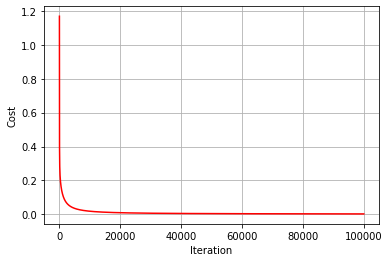

Cost: 0.0017308844266695819 
theta:
[[-62.26174877]
 [ 22.66999732]]


h: [[6.39029362e-18]
 [3.73317709e-03]
 [9.96821756e-01]
 [1.00000000e+00]]

 h_changed: [[0.]
 [0.]
 [1.]
 [1.]]


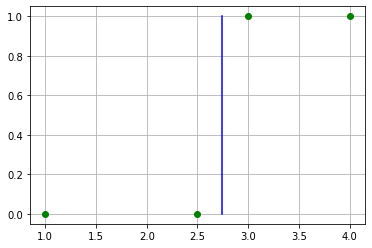

In [ ]:
X = np.array([[1],[2.5],[3],[4]])
Xbais = add_bais(X)
y = np.array([[0],[0],[1],[1]])
theta = np.random.random((Xbais.shape[1],1))

itr = 99999
alpha = 0.8
theta, J_history = Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}\n\n")
h,_= hyp_function(Xbais,theta)
h_changed = descision_thresold(h)
print(f"h: {h}\n\n h_changed: {h_changed}")

# Descision boundry
a = (-theta[0]/theta[1])
yy = np.linspace(0, 1)
xx =   a * np.ones((len(yy),1))

plt.plot(X,y,'go')
plt.plot(xx,yy,'b')
plt.grid()
plt.show()

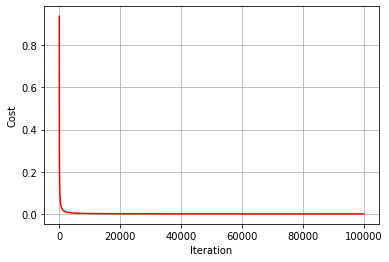

Cost: 0.0002128283565258167 
theta:
[[-24.54066158]
 [ 16.24824926]
 [ 16.24824926]]


h: [[9.99649513e-01]
 [2.50346976e-04]
 [2.50346976e-04]
 [2.19849810e-11]]

 h_changed: [[1.]
 [0.]
 [0.]
 [0.]]


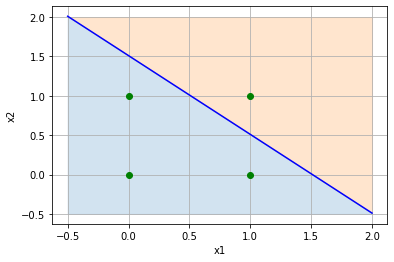

In [ ]:
# And Logic
#1 1 = 1
#0 1 = 0
#1 0 = 0
#0 0 = 0

X = np.array([[1,1],[1,0],[0,1],[0,0]])
Xbais = add_bais(X)
y = np.array([[1],[0],[0],[0]])
theta = np.random.random((Xbais.shape[1],1))

itr = 99999
alpha = 0.8
theta, J_history = Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}\n\n")
h,_= hyp_function(Xbais,theta)
h_changed = descision_thresold(h)
print(f"h: {h}\n\n h_changed: {h_changed}")

# Descision boundry
c = -theta[0]/theta[2]
m = -theta[1]/theta[2]
xmin, xmax = -0.5, 2
ymin, ymax = -0.5, 2
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(X[:,0],X[:,1],'go')
plt.plot(xd,yd,'b')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()


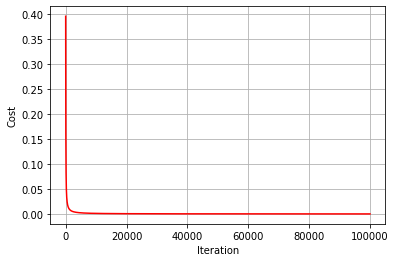

Cost: 0.00011262622320331082 
theta:
[[-8.29277236]
 [17.50200234]
 [17.50200233]]


h: [[1.00000000e+00]
 [9.99899899e-01]
 [9.99899899e-01]
 [2.50256881e-04]]

 h_changed: [[1.]
 [1.]
 [1.]
 [0.]]


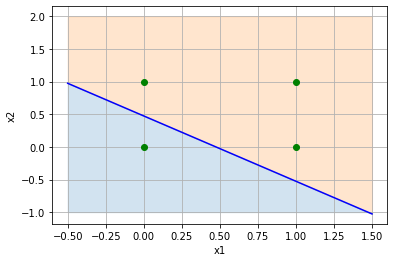

In [ ]:
# Or Logic
#1 1 = 1
#0 1 = 1
#1 0 = 1
#0 0 = 0

X = np.array([[1,1],[1,0],[0,1],[0,0]])
Xbais = add_bais(X)
y = np.array([[1],[1],[1],[0]])
theta = np.random.random((Xbais.shape[1],1))

itr = 99999
alpha = 0.8
theta, J_history = Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}\n\n")
h,_= hyp_function(Xbais,theta)
h_changed = descision_thresold(h)
print(f"h: {h}\n\n h_changed: {h_changed}")

# Descision boundry
c = -theta[0]/theta[2]
m = -theta[1]/theta[2]
xmin, xmax = -0.5, 1.5
ymin, ymax = -1, 2
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(X[:,0],X[:,1],'go')
plt.plot(xd,yd,'b')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()


[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


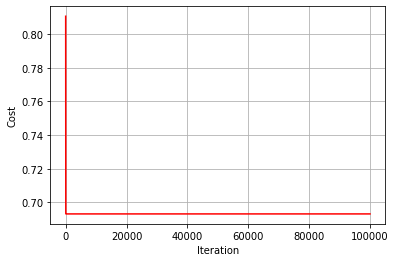

Cost: 0.6931471805599453 
theta:
[[-3.25866769e-16]
 [ 2.24657758e-16]
 [ 2.27867066e-16]]


h: [[0.5]
 [0.5]
 [0.5]
 [0.5]]

 h_changed: [[1.]
 [1.]
 [1.]
 [1.]]


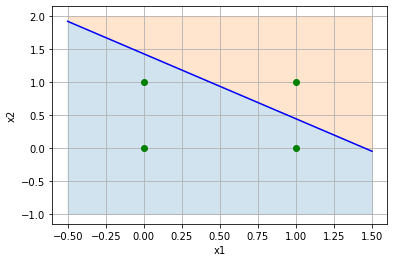

In [ ]:
# Xor Logic
#1 1 = 0
#0 1 = 1
#1 0 = 1
#0 0 = 0

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Xbais = add_bais(X)
print(Xbais)
y = np.array([[0],[1],[1],[0]])
theta = np.random.random((Xbais.shape[1],1))

itr = 99999
alpha = 0.8
theta, J_history = Gradient_Descent(Xbais, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}\n\n")
h,_= hyp_function(Xbais,theta)
h_changed = descision_thresold(h)
print(f"h: {h}\n\n h_changed: {h_changed}")

# Descision boundry
c = -theta[0]/theta[2]
m = -theta[1]/theta[2]
xmin, xmax = -0.5, 1.5
ymin, ymax = -1, 2
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(X[:,0],X[:,1],'go')
plt.plot(xd,yd,'b')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()


Above Prediction is not correct becuase Or model doesn't fit this type of problem cause this problem need non-linear hypothesis but we use linear straighn line for this.

## **Day 4**

##### **Multiclass Classification: One Vs All**

In binary Class classification We had $y=\{0,1\}$, But now we have to classfiy more than two class $y=\{0,1,\dots,n\}$

>$y∈\{0,1...n\}$

>$h^{(0)}_θ(x)=P(y=0|x;θ)$

>$h^{(1)}_θ(x)=P(y=1|x;θ)$

> $\dots $

>$h^{(n)}_θ(x)=P(y=n|x;θ)$

>$prediction=maxi(h(i)θ(x))$

We are basically choosing one class and then lumping all the others into a single second class. We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction.

###### **Code**

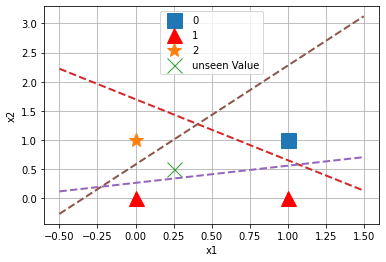

In [ ]:
# Multiclass classfication
#1 1 = 0
#0 1 = 1
#1 0 = 2
#0 0 = 1

X = np.array([[1,1],[1,0],[0,1],[0,0]])
Xbais = add_bais(X)

# Multi Class Classification
y = np.array([[0],[1],[2],[1]])
theta = np.random.random((Xbais.shape[1],1))

# Points
size=15
plt.plot(X[0][0],X[0][1],'s', markersize=size)
plt.plot(X[1][0],X[1][1],'r^', markersize=size)
plt.plot(X[2][0],X[2][1],'*', markersize=size)

# Unseen Value
plt.plot(0.25,0.5,'x', markersize=size)

plt.plot(X[3][0],X[3][1],'r^', markersize=size)


# Now wee need to convert c Class into "1" and other into zero
# And repeat this process untill all class 

theta_i = []
itr = 50
alpha = 0.8

for c in range(1,np.max(y+2)):
  y_change = np.copy(y+1)
  y_change[y_change!=c] = 0
  y_change[y_change==c] = 1
  flag = False
  theta, J_history = Gradient_Descent(Xbais, y_change, theta, alpha, itr,flag)

  h,_= hyp_function(Xbais,theta)
  theta_i.append(theta[:,0])



  # Descision boundry
  const = -theta[0]/theta[2]
  m = -theta[1]/theta[2]
  xmin, xmax = -0.5, 1.5
  ymin, ymax = -1, 2
  xd = np.array([xmin, xmax])
  yd = m*xd + const

  plt.plot(xd,yd,lw=2, ls='--')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['0','1','2','unseen Value'])
plt.grid()
plt.show()

###### **Unseen Value**

On a new input $x$, to maek a prediction, pick the class $i$ that maximize $h^{(i)}_\theta(x)$

In [ ]:
# Unseen Values
X_new = np.array([[1,0.25,0.5]])

# K classes Theta
theta_array = np.array(theta_i).T

# hypothesis on K thetas
h,_ = hyp_function(X_new,theta_array)

# Return class which new data belongs
print(f"Predicted Class: {np.argmax(h)}")
h

Predicted Class: 1


array([[0.16298909, 0.36231878, 0.31746223]])

## **Day 5**

##### **Regularization**

###### **High bias / underfitting**

High bias or underfitting is when the form of our hypothesis function h maps poorly to the trend of the data. **It is usually caused by a function that is too simple or uses too few features.**

**Example** if we take ($h_\theta(x) = \theta_0 + \theta_1*x$) then we are making an initial assumption that a linear model will fit the training data well and will be able to generalize but that may not be the case.

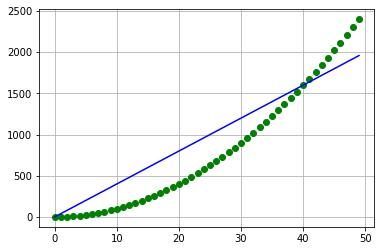

In [ ]:
X = np.array(range(50)).reshape(-1,1)
Y = np.array(np.power(range(50),2)).reshape(-1,1)
theta = np.array([[0],[40]])
Xbais = add_bais(X)
plt.plot(X,Y,'go')
plt.plot(X,Xbais.dot(theta),'b')
plt.grid()
plt.show()

###### **overfitting / high variance**

overfitting or high variance is caused by a hypothesis function that fits the available data but does not generalize well to predict new data. **It is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data.**

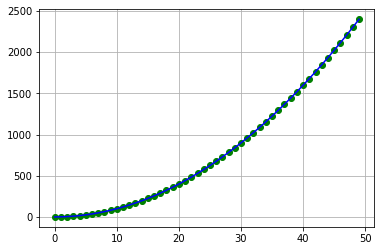

In [ ]:
X = np.array(range(50)).reshape(-1,1)
X = np.insert(X,1,(np.power(X,2).T),axis=1)
Y = np.array(np.power(range(50),2)).reshape(-1,1)
theta = np.array([[0],[0],[1]])
Xbais = add_bais(X)
plt.plot(X[:,0],Y,'go')
plt.plot(X[:,0],Xbais.dot(theta),'b')
plt.grid()
plt.show()

**There are two main options to address the issue of overfitting**

1. Reduce the Numbers of Feature
2. Regularization

**Note**: We can manually raduce features or use a model selection algorithm. Regularization works well when we have lots of slightly usefull features. 

###### **Regularized Cost Function**

Small value for paramete $ \theta_1 \theta_2 \dots \theta_n$ **Note** exclude $\theta_0$ 
1. Simpler hypothesis
2. Less prone to overfitting

If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their cost.

**Say we wanted to make the following function more quadratic**:

$h_\theta(x) = \theta_0+\theta_1x+\theta_2x^2+\theta_3x^3+\theta_4x^4$

We need to tweek/pinalize some values of $\theta_3 \theta_4$ Without actually getting rid of these features or changing the form of our hypothesis, we can instead modify our **cost function**:

$\frac{1}{2m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)})^2+100⋅\theta^2_3 +100⋅\theta^2_4 $

We've added two extra terms at the end to inflate the cost of $\theta_3$ and $\theta_4$ Now, in order for the cost function to get close to zero, we will have to reduce the values of $\theta_3$ and $\theta_4$ to near zero. This will in turn greatly reduce the values of $\theta_3x^3$ and $\theta_4x^4$ in our hypothesis function.

We could also regularize all of our theta parameters in a single summation:

$ min_\theta \frac{1}{2m} [\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^n \theta_j^2]$

The λ, or lambda, is the regularization parameter. It determines how much the costs of our theta parameters are inflated. You can visualize the effect of regularization in this interactive plot : https://www.desmos.com/calculator/1hexc8ntqp 

if λ to large -> **Underfitting** \\
if λ = 0 or to small -> **Without Regulatization** 

###### **Code**

In [ ]:
# Regularized Cost Function
def Cost_function(h,y,theta,lambda_value):
  error = h-y
  sum_sqr_error = np.dot(error.T,error)  # This is method to square and summation
  J = 1/(2*m) *(sum_sqr_error + lambda_value*np.dot(theta[1:,:].T,theta[1:,:]))
  return J

##### **Regularized Linear Regression**

We will modify our gradient descent function to separate out $\theta_0$ from the rest of the parameters because we do not want to penalize $\theta_0$

$
Repeat \{\\
\theta_0 = \theta_0 - \frac{\alpha}{m}*\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_0^i \\
\theta_j = \theta_j - \frac{\alpha}{m}*\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^i + \frac{\lambda}{m}\theta_j \\
\}
$.

WE can maulpulate our cost function just like it:

$\theta_j = \theta_j(1-\alpha\frac{\lambda}{m}) - \frac{\alpha}{m}*\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^i $

The first term in the above equation, $1 - \alpha\frac{\lambda}{m}$ will always be less than 1. Intuitively you can see it as reducing the value of $\theta_j$ some amount on every update.

Notice that the second term is now exactly the same as it was before.
​	
 .

###### **Code**

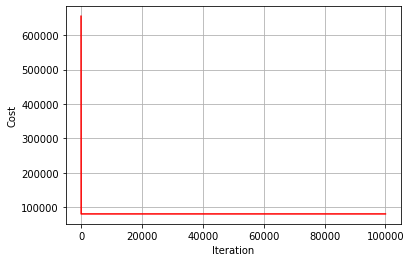

Cost: 80942.26816943272 
theta:
[[176.323181  ]
 [597.63304143]
 [647.79726426]
 [619.30253402]]


In [ ]:
# Gradient Descent With regularization

def Gradient_Descent_regularization(X, y, theta, alpha=0.01, itr=10, lambda_value=0.2 ,flag=True):
  J_history = []
  theta_values = []
  counter = 0
  while counter < itr:

    h = hyp_function(Xbais,theta) # Hypothesis Function
    J = Cost_function(h, y,theta, lambda_value) # Cost  function
 
    theta[0] = theta[0] - (alpha/y.shape[0]) * np.sum((h - y))
    # Regulzarized Form
    theta[1:,:] = theta[1:,:]*(1-alpha*(lambda_value/y.shape[0])) - (alpha/y.shape[0]) * np.dot(X[:,1:].T,(h - y)) # Vectorize Form  
    
    J_history.append(float(J)) # Save Cost History
    counter +=1
 
  # Plot Graph Cost Function Vs. Iteration
  if flag:
    plt.plot(range(len(J_history)),J_history,'r')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show(True)

  return theta, J_history

def hyp_function(X, theta):
  return X.dot(theta)

def multiple_data_generate(m):

  np.random.seed(42)
  X = np.array(range(1,m+1)).reshape(-1,1) # m*n Matrix generated
  X = np.insert(X,1,np.power(X[:,0],2).T,axis=1)
  X = np.insert(X,2,np.power(X[:,0],3).T,axis=1)


  y = np.power(range(1,m+1),2).reshape(-1,1)
  theta = np.random.random((X.shape[1]+1,1)) 
  return X,y,theta

# Standarization
def Standarization(X):
  Xarray = []
  sigma = []
  mu = []
  for i in range(X.shape[1]):
    mu.append(np.min(X[:,i]))
    sigma.append(np.std(X[:,i]))
    Xarray.append((X[:,i]-mu[i])/(sigma[i]))
  return np.array(Xarray).T,mu,sigma

def Normalization(X):
  Xarray = []
  sigma = []
  mu = []
  for i in range(X.shape[1]):
    mu.append(np.min(X[:,i]))
    sigma.append(np.max(X[:,i] )-np.min(X[:,i]))
    Xarray.append((X[:,i]-mu[i])/(sigma[i]))
  return np.array(Xarray).T,mu,sigma



m=50
n=3
X,y,theta = multiple_data_generate(m) # Generate Data (m=examples,n=features)
X,_,_ = Normalization(X) 
Xbais = np.insert(X,0,1,axis=1)

itr = 99999
alpha= 0.6
lambda_value = 5
theta, J_history= Gradient_Descent_regularization(Xbais, y, theta, alpha, itr,lambda_value)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")

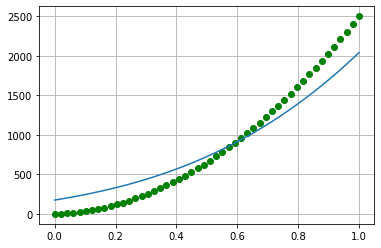

In [ ]:
plt.plot(X[:,0],y,'go')
plt.plot(X[:,0],Xbais.dot(theta))
plt.grid()
plt.show()

##### **Regularization in Normal Equation**

To add in regularization, the equation is the same as our original, except that we add another term inside the parentheses:

$\theta = (X^TX-\lambda L)^{-1}X^TY$

$L = \begin{bmatrix}
0 & 0 & 0  & \dots & 0  \\
0 & 1 & 0 & \dots & 0  \\
0 & 0 & 1  & \dots & 0  \\
\vdots & \vdots & \vdots & \vdots & \vdots  \\
0 & 0 & 0 & 0 & 1
\end{bmatrix}$

L should have dimension (n+1)×(n+1), its look like identity matrix except 1st term is Zero, this is because we dont want to penalize $\theta_0$ 

Recall that if m ≤ n, then $X^TX$ is non-invertible. However, when we add the term $λ⋅L$, then $X^TX$becomes invertible.

###### **Code**

In [ ]:
m=50
lambda_value = 999999
X,y,theta = multiple_data_generate(m) # Generate Data (m=examples,n=features)

Xbais = np.insert(X,0,1,axis=1)

L = np.eye(X.shape[1]+1)
L[0][0] = 0

# Regulzarization
regularize = lambda_value*L
##########################

inverse = np.linalg.inv(np.dot(Xbais.T,Xbais)-regularize)
temp = np.dot(Xbais.T,y)
theta = np.dot(inverse,temp)

h = hyp_function(Xbais,theta)
J = Cost_function(h,y,theta,lambda_value)
print(f"theta:\n{theta}\n\nCost:{float(J)}")

theta:
[[ 9.27517970e+02]
 [-1.67825304e-01]
 [-3.81443242e+00]
 [ 9.87297748e-02]]

Cost:329900.14542379114


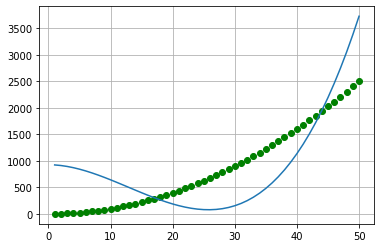

In [ ]:
plt.plot(X[:,0],y,'go')
plt.plot(X[:,0],Xbais.dot(theta))
plt.grid()
plt.show()

##### **Regulzarized Logistic regression**

We can regularize logistic regression in a similar way that we regularize linear regression. Let's start with the **cost function**.

> $J(θ)=-\frac{1}{m}⋅(y^T\log(h)+(1−y)^T\log(1−h))+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$

In [ ]:
# Logistics Regession Cost Function
def Cost_function(h,y,theta, lambda_value):
  regularized = (lambda_value/(2*y.shape[0])) * theta[1:,:].T.dot(theta[1:,:])
  return -(1/y.shape[0]) * (np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h))) + regularized

**Gradient Descent**: Just like with linear regression, we will want to separately update $\theta_0$ 
and the rest of the parameters because we do not want to regularize $\theta_0$

$\theta_j = \theta_j(1-\alpha\frac{\lambda}{m}) - \frac{\alpha}{m}*\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x_j^i $

identical Gradient Descent for Logistic Regression

###### **Polynomial Logistic Regression and Regularization**

###### **Code**

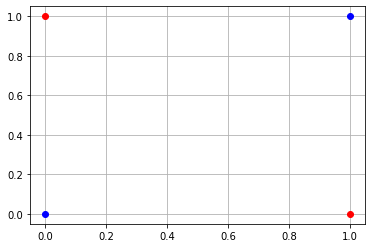

In [ ]:
# XNor Logic
# 1,1 = 1
# 0,1 = 0
# 1,0 = 0
# 0,0 = 0
 
data = np.array([[1,1,0],[1,0,1],[0,1,1],[0,0,0]])
X = data[:,:2]
y = data[:,2].reshape(-1,1)
 
pos = X[:,0]
neg = X[:,1]
 
pos = data[data[:,2]==1]
neg = data[data[:,2]==0]
y = data[:,2].reshape(-1,1)
plt.plot(pos[:,0],pos[:,1],'ro')
plt.plot(neg[:,0],neg[:,1],'bo')
plt.grid()
plt.show()

In [ ]:
# Map Feature Just like (x1,x2,x1^2,x1x2,x2^2,etc)
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res
 
#set Polynomial Degree
degree = 10
Xbais = mapFeature(X[:,0],X[:,1],degree)
 
theta = np.random.random((Xbais.shape[1],1))
 
def sigmoid(z):
  return (1)/(1+np.exp(-z))
 
def hyp_function(X, theta):
  z = X.dot(theta)
  return sigmoid(z)
 
def add_bais(X):
  return np.insert(X,0,1,axis=1)
 
h = hyp_function(Xbais,theta)
 
lambda_value=0
print(f"Without regularized : {Cost_function(h,y,theta,lambda_value)}")
 
lambda_value=3
print(f"regularized : ({Cost_function(h,y,theta,lambda_value)}")

Without regularized : [[7.72449753]]
regularized : ([[15.11567566]]


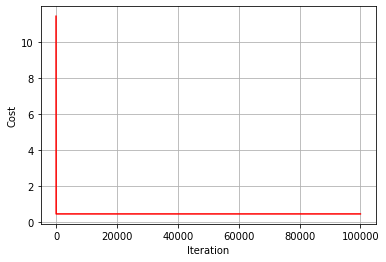

Cost: 0.46367986884179174


In [ ]:
 
itr = 99999
alpha= 0.8
lambda_value = 1.5
theta, J_history= Gradient_Descent_regularization(Xbais, y, theta, alpha, itr,lambda_value)
print(f"Cost: {J_history[-1]}")

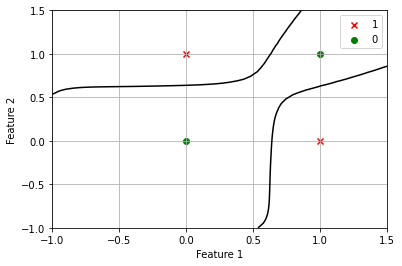

In [ ]:
# define a function to plot the decision boundary
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['1', '0', 'Decision Boundary'])
    return cs
# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')

axes.scatter(pos[:,0], pos[:,1], color = 'r', marker='x', label='1')
axes.scatter(neg[:,0], neg[:,1], color = 'g', marker='o', label='0')
axes.legend(title='Legend', loc = 'best' )
plt.grid()
plotDecisionBoundary(theta, degree, axes)


##### **Bais Feature**

A "bias" feature is simply a way to move the "best fit" learned vector to better fit the data. For example, consider a learning problem with a single feature $X_1$ The formula without the $X_0$ feature is just $theta_1 * X_1 = y $ This is graphed as a line that always passes through the origin, with slope $\theta_1$. The $x_0$ term allows the line to pass through a different point on the $y$ axis. This will almost always give a better fit. Not all best fit lines go through the origin (0,0) right?